<a href="https://colab.research.google.com/github/mugureeDOTcom/DataStructures/blob/main/Copy_of_Project25.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install google-search-results pandas nltk transformers streamlit


  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.7/9.7 MB 35.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 60.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 5.1 MB/s eta 0:00:00
  Created wheel for google-search-results: filename=google_search_results-2.4.2-py3-none-any.whl size=32009 sha256=264e08fea2a5d37cf1c4fc1289909f2a569c731cd533c81ff0f0eb6a2b2cacf8
  Stored in directory: /root/.cache/pip/wheels/6e/42/3e/aeb691b02cb7175ec70e2da04b5658d4739d2b41e5f73cd06f
Successfully built google-search-results


In [2]:
from serpapi import GoogleSearch
import pandas as pd
import time

# 🔑 Replace with your actual SerpAPI Key
SERPAPI_KEY = "339cfec155573d25c3ca634e037e6d9c3455a5ec8b63bb7bc7179f21288b8a53"

# 🎯 Replace with the Place ID you got
PLACE_ID = "ChIJTydumocALxgRV5VfnxxO4Cs"

# 🔄 Fetch Up to 3,000 Reviews
all_reviews = []
start = 0
max_reviews = 500

while len(all_reviews) < max_reviews:
    print(f"🔍 Fetching reviews starting from index {start}...")

    params = {
        "engine": "google_maps_reviews",
        "place_id": PLACE_ID,
        "api_key": SERPAPI_KEY,
        "start": start
    }

    search = GoogleSearch(params)
    results = search.get_dict()

    # Extract reviews
    reviews = results.get("reviews", [])
    if not reviews:
        print("✅ No more reviews left. Stopping.")
        break

    all_reviews.extend(reviews)

    start += len(reviews)
    time.sleep(2)

    # 🔥 Save in Batches (Every 500 reviews)
    if len(all_reviews) % 500 == 0 or len(all_reviews) >= max_reviews:
        df = pd.DataFrame(all_reviews[:max_reviews])
        df.to_csv("reviews.csv", index=False)
        print(f"✅ Saved {len(df)} reviews so far...")

# 🚀 Final Save
df = pd.DataFrame(all_reviews[:max_reviews])
df.to_csv("reviews.csv", index=False)

print(f"✅ Total reviews scraped: {len(df)}")
df.head()


🔍 Fetching reviews starting from index 0...
🔍 Fetching reviews starting from index 8...
🔍 Fetching reviews starting from index 16...
🔍 Fetching reviews starting from index 24...
🔍 Fetching reviews starting from index 32...
🔍 Fetching reviews starting from index 40...
🔍 Fetching reviews starting from index 48...
🔍 Fetching reviews starting from index 56...
🔍 Fetching reviews starting from index 64...
🔍 Fetching reviews starting from index 72...
🔍 Fetching reviews starting from index 80...
🔍 Fetching reviews starting from index 88...
🔍 Fetching reviews starting from index 96...
🔍 Fetching reviews starting from index 104...
🔍 Fetching reviews starting from index 112...
🔍 Fetching reviews starting from index 120...
🔍 Fetching reviews starting from index 128...
🔍 Fetching reviews starting from index 136...
🔍 Fetching reviews starting from index 144...
🔍 Fetching reviews starting from index 152...
🔍 Fetching reviews starting from index 160...
🔍 Fetching reviews starting from index 168...
🔍 F

,link,rating,date,iso_date,iso_date_of_last_edit,images,source,review_id,user,snippet,extracted_snippet,likes,response
0,https://www.google.com/maps/reviews/data=!4m8!...,5.0,2 weeks ago,2025-02-21T14:50:59Z,2025-02-21T14:50:59Z,[https://lh3.googleusercontent.com/geougc-cs/A...,Google,ChdDSUhNMG9nS0VJQ0FnTUNnajZLMDlRRRAB,"{'name': 'Revival and culture Tours', 'link': ...",Lesiolo Hills Hotel is an absolute gem nestled...,{'original': 'Lesiolo Hills Hotel is an absolu...,0,"{'date': '2 weeks ago', 'iso_date': '2025-02-2..."
1,https://www.google.com/maps/reviews/data=!4m8!...,5.0,4 months ago,2024-11-10T14:57:43Z,2024-11-10T19:51:08Z,NaN,Google,ChZDSUhNMG9nS0VJQ0FnSUMzNy1Yd1dnEAE,"{'name': 'Christine Nyikal', 'link': 'https://...",I had an amazing time at this place! The ambie...,{'original': 'I had an amazing time at this pl...,0,"{'date': '4 months ago', 'iso_date': '2024-11-..."
2,https://www.google.com/maps/reviews/data=!4m8!...,5.0,3 months ago,2024-11-14T12:09:18Z,2024-11-14T12:13:22Z,NaN,Google,ChdDSUhNMG9nS0VJQ0FnSUQzLXFDOGtRRRAB,"{'name': 'william odera', 'link': 'https://www...",Wonderful place to be. The food was sumptuous ...,{'original': 'Wonderful place to be. The food ...,0,"{'date': '3 months ago', 'iso_date': '2024-11-..."
3,https://www.google.com/maps/reviews/data=!4m8!...,5.0,2 months ago,2025-01-11T17:44:02Z,2025-01-11T17:48:20Z,NaN,Google,ChZDSUhNMG9nS0VJQ0FnSUNfZ0xlOFJREAE,"{'name': 'Winnie Githinji Mwaniki', 'link': 'h...","Great food, very helpful staff.\n\nLeila made ...","{'original': 'Great food, very helpful staff. ...",0,"{'date': 'a month ago', 'iso_date': '2025-01-2..."
4,https://www.google.com/maps/reviews/data=!4m8!...,1.0,2 months ago,2024-12-25T12:45:49Z,2024-12-25T12:52:28Z,NaN,Google,ChZDSUhNMG9nS0VJQ0FnSUR2NzdINkdnEAE,"{'name': 'Renee Tikolo', 'link': 'https://www....",Very poor service.\nWe waited over 2 hours for...,{'original': 'Very poor service. We waited ove...,0,"{'date': 'a month ago', 'iso_date': '2025-01-2..."


In [3]:
import pandas as pd
import re

# 📌 Load the scraped reviews
df = pd.read_csv("reviews.csv")

# 🔍 Check available columns
print("✅ Available Columns:", df.columns)

# ✅ Set the correct column for reviews
actual_col_name = "snippet"

# 🔄 Cleaning function
def clean_text(text):
    text = re.sub(r"http\S+", "", text)
    text = re.sub(r"[^a-zA-Z0-9\s]", "", text)
    text = text.replace("\n", " ")
    return text.strip().lower()

df["Cleaned_Review"] = df[actual_col_name].astype(str).apply(clean_text)

# 🚀 Save Cleaned Data
df.to_csv("cleaned_reviews.csv", index=False)

# 🎯 Show Sample Cleaned Reviews
print("✅ Final Cleaning Complete! First 5 Cleaned Reviews:")
df[["snippet", "Cleaned_Review"]].head()


✅ Available Columns: Index(['link', 'rating', 'date', 'iso_date', 'iso_date_of_last_edit', 'images',
       'source', 'review_id', 'user', 'snippet', 'extracted_snippet', 'likes',
       'response'],
      dtype='object')
✅ Final Cleaning Complete! First 5 Cleaned Reviews:


,snippet,Cleaned_Review
0,Lesiolo Hills Hotel is an absolute gem nestled...,lesiolo hills hotel is an absolute gem nestled...
1,I had an amazing time at this place! The ambie...,i had an amazing time at this place the ambien...
2,Wonderful place to be. The food was sumptuous ...,wonderful place to be the food was sumptuous ...
3,"Great food, very helpful staff.\n\nLeila made ...",great food very helpful staff leila made sure...
4,Very poor service.\nWe waited over 2 hours for...,very poor service we waited over 2 hours for o...


In [4]:
import pandas as pd
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
from transformers import pipeline

# 📌 Load the cleaned reviews
df = pd.read_csv("cleaned_reviews.csv")

# ✅ Initialize Sentiment Analyzers
nltk.download("vader_lexicon")
sia = SentimentIntensityAnalyzer()
sentiment_pipeline = pipeline("sentiment-analysis", model="nlptown/bert-base-multilingual-uncased-sentiment")

# 🎯 Function to classify sentiment using VADER (English)
def analyze_sentiment(text):
    score = sia.polarity_scores(text)["compound"]
    if score >= 0.05:
        return "Positive"
    elif score <= -0.05:
        return "Negative"
    else:
        return "Neutral"

# 🎯 Function to classify sentiment using BERT (Swahili + English)
def analyze_multilingual_sentiment(text):
    result = sentiment_pipeline(text)[0]["label"]
    return "Positive" if "5" in result or "4" in result else "Negative" if "1" in result or "2" in result else "Neutral"

# 🔥 Apply Sentiment Analysis
df["Sentiment_VADER"] = df["Cleaned_Review"].apply(analyze_sentiment)
df["Sentiment_BERT"] = df["Cleaned_Review"].apply(analyze_multilingual_sentiment)

# 🚀 Save Sentiment Results
df.to_csv("sentiment_results.csv", index=False)

# 🎯 Show Sample Sentiment Analysis Results
print("✅ Sentiment Analysis Complete! First 5 Reviews:")
df[["Cleaned_Review", "Sentiment_VADER", "Sentiment_BERT"]].head()


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/953 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/669M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/39.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/872k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

Device set to use cpu


✅ Sentiment Analysis Complete! First 5 Reviews:


,Cleaned_Review,Sentiment_VADER,Sentiment_BERT
0,lesiolo hills hotel is an absolute gem nestled...,Positive,Positive
1,i had an amazing time at this place the ambien...,Positive,Positive
2,wonderful place to be the food was sumptuous ...,Positive,Positive
3,great food very helpful staff leila made sure...,Positive,Positive
4,very poor service we waited over 2 hours for o...,Negative,Negative


In [5]:
import pandas as pd
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
from transformers import pipeline

# 📌 Load the cleaned reviews
df = pd.read_csv("cleaned_reviews.csv")

# ✅ Initialize Sentiment Analyzers
nltk.download("vader_lexicon")
sia = SentimentIntensityAnalyzer()
sentiment_pipeline = pipeline("sentiment-analysis", model="nlptown/bert-base-multilingual-uncased-sentiment")

# 🎯 Function to categorize sentiment based on star rating
def categorize_star_rating(rating):
    if rating >= 4.0:
        return "Positive"
    elif rating == 3.0:
        return "Neutral"
    else:
        return "Negative"

# 🎯 Function to classify sentiment using VADER
def analyze_sentiment(text):
    score = sia.polarity_scores(text)["compound"]
    if score >= 0.05:
        return "Positive"
    elif score <= -0.05:
        return "Negative"
    else:
        return "Neutral"

# 🎯 Function to classify sentiment using BERT (Swahili + English)
def analyze_multilingual_sentiment(text):
    result = sentiment_pipeline(text)[0]["label"]
    return "Positive" if "5" in result or "4" in result else "Negative" if "1" in result or "2" in result else "Neutral"

# 🔥 Apply Sentiment Analysis
df["Star_Category"] = df["rating"].apply(categorize_star_rating)
df["Sentiment_VADER"] = df["Cleaned_Review"].apply(analyze_sentiment)
df["Sentiment_BERT"] = df["Cleaned_Review"].apply(analyze_multilingual_sentiment)

# 🚀 Save Sentiment Results
df.to_csv("sentiment_results.csv", index=False)

# 🎯 Show Sample Sentiment Analysis Results
print("✅ Sentiment Analysis Complete! First 5 Reviews:")
df[["rating", "Star_Category", "Cleaned_Review", "Sentiment_VADER", "Sentiment_BERT"]].head()


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
Device set to use cpu


✅ Sentiment Analysis Complete! First 5 Reviews:


,rating,Star_Category,Cleaned_Review,Sentiment_VADER,Sentiment_BERT
0,5.0,Positive,lesiolo hills hotel is an absolute gem nestled...,Positive,Positive
1,5.0,Positive,i had an amazing time at this place the ambien...,Positive,Positive
2,5.0,Positive,wonderful place to be the food was sumptuous ...,Positive,Positive
3,5.0,Positive,great food very helpful staff leila made sure...,Positive,Positive
4,1.0,Negative,very poor service we waited over 2 hours for o...,Negative,Negative


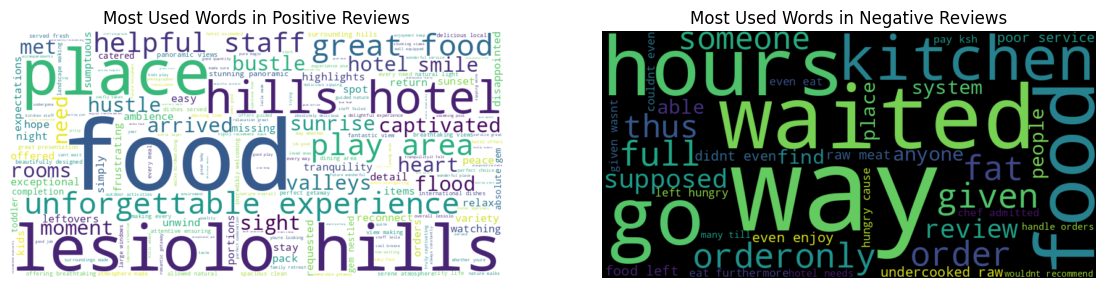

In [6]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# 📌 Load sentiment results
df = pd.read_csv("sentiment_results.csv")

# ✅ Generate a Word Cloud for Positive Reviews
positive_words = " ".join(df[df["Sentiment_VADER"] == "Positive"]["Cleaned_Review"])
wordcloud_pos = WordCloud(width=800, height=400, background_color="white").generate(positive_words)

# ✅ Generate a Word Cloud for Negative Reviews
negative_words = " ".join(df[df["Sentiment_VADER"] == "Negative"]["Cleaned_Review"])
wordcloud_neg = WordCloud(width=800, height=400, background_color="black").generate(negative_words)

# 🎯 Show Word Clouds
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.imshow(wordcloud_pos, interpolation="bilinear")
plt.title("Most Used Words in Positive Reviews")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(wordcloud_neg, interpolation="bilinear")
plt.title("Most Used Words in Negative Reviews")
plt.axis("off")

plt.show()


In [7]:
from collections import Counter

# ✅ Extract all words from Positive & Negative reviews
positive_text = " ".join(df[df["Sentiment_VADER"] == "Positive"]["Cleaned_Review"]).split()
negative_text = " ".join(df[df["Sentiment_VADER"] == "Negative"]["Cleaned_Review"]).split()

# ✅ Count word frequencies
positive_words_count = Counter(positive_text).most_common(10)
negative_words_count = Counter(negative_text).most_common(10)

# 🎯 Show the top words
print("✅ Top 10 Words in Positive Reviews:")
print(positive_words_count)

print("\n✅ Top 10 Words in Negative Reviews:")
print(negative_words_count)


✅ Top 10 Words in Positive Reviews:
[('the', 2704), ('and', 1317), ('of', 881), ('was', 755), ('a', 690), ('to', 628), ('i', 503), ('food', 502), ('for', 502), ('an', 501)]

✅ Top 10 Words in Negative Reviews:
[('to', 682), ('we', 372), ('the', 372), ('even', 186), ('our', 124), ('food', 124), ('had', 124), ('way', 124), ('get', 124), ('and', 124)]


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


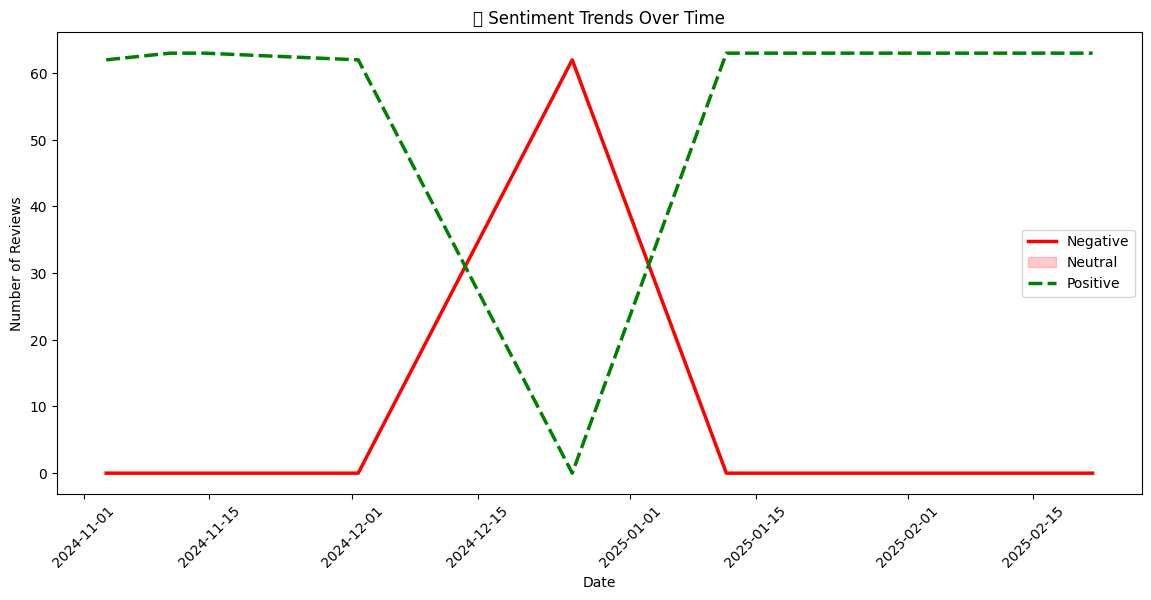

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 📌 Load sentiment results
df = pd.read_csv("sentiment_results.csv")

# ✅ Convert `iso_date` column to Date format
df["iso_date"] = pd.to_datetime(df["iso_date"])

# ✅ Group sentiment counts by date
sentiment_trend = df.groupby(["iso_date", "Sentiment_VADER"]).size().unstack()

# ✅ Fill missing values with 0 (if some days have no reviews)
sentiment_trend = sentiment_trend.fillna(0)

# 🎯 Plot Sentiment Trends Over Time
plt.figure(figsize=(14, 6))
sns.lineplot(data=sentiment_trend, palette={"Positive": "green", "Neutral": "gray", "Negative": "red"}, linewidth=2.5)

plt.title("📈 Sentiment Trends Over Time")
plt.xlabel("Date")
plt.ylabel("Number of Reviews")
plt.xticks(rotation=45)
plt.legend(["Negative", "Neutral", "Positive"])

plt.show()


In [9]:
%%writefile app.py
import streamlit as st
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# 📌 Load sentiment analysis results
df = pd.read_csv("sentiment_results.csv")

st.title("VibeChek - Google Reviews Sentiment Analysis")

# ✅ Sentiment & Star Rating Breakdown
st.subheader("Sentiment Breakdown")
st.bar_chart(df["Sentiment_VADER"].value_counts())

st.subheader("Star Rating Breakdown")
st.bar_chart(df["rating"].value_counts())

# ✅ Word Clouds
st.subheader("Most Common Words in Reviews")
option = st.radio("Select Sentiment", ["Positive", "Negative"])
word_text = " ".join(df[df["Sentiment_VADER"] == option]["Cleaned_Review"])
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(word_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
st.pyplot(plt)

# ✅ Filter Reviews by Sentiment
st.subheader("Filter Reviews by Sentiment")
selected_sentiment = st.selectbox("Select Sentiment", ["Positive", "Negative", "Neutral"])
filtered_reviews = df[df["Sentiment_VADER"] == selected_sentiment]
st.write(filtered_reviews[["rating", "Cleaned_Review"]].head(10))

st.success("✅ Dashboard Updated!")


Writing app.py


In [10]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# 📌 Load the sentiment results
df = pd.read_csv("sentiment_results.csv")

# ✅ Extract only Negative reviews for analysis
negative_reviews = df[df["Sentiment_VADER"] == "Negative"]["Cleaned_Review"]

# ✅ Convert text into a numerical format
vectorizer = CountVectorizer(stop_words="english", max_features=1000)
X = vectorizer.fit_transform(negative_reviews)

# ✅ Apply LDA Topic Modeling
lda = LatentDirichletAllocation(n_components=3, random_state=42)
lda.fit(X)

# 🎯 Show Top 10 Words for Each Topic
print("✅ Key Issues in Negative Reviews:")
for i, topic in enumerate(lda.components_):
    print(f"\n🔍 Topic {i+1}:")
    print(", ".join([vectorizer.get_feature_names_out()[index] for index in topic.argsort()[-10:]]))


✅ Key Issues in Negative Reviews:

🔍 Topic 1:
handle, pay, people, didnt, undercooked, needs, enjoy, fat, 6000, chef

🔍 Topic 2:
undercooked, hours, people, needs, enjoy, supposed, fat, 6000, review, admitted

🔍 Topic 3:
recommend, cause, orderonly, wasnt, poor, left, order, food, way, given


In [11]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# 📌 Load the sentiment results
df = pd.read_csv("sentiment_results.csv")

# ✅ Extract Negative & Positive reviews
negative_reviews = df[df["Sentiment_VADER"] == "Negative"]["Cleaned_Review"]
positive_reviews = df[df["Sentiment_VADER"] == "Positive"]["Cleaned_Review"]

# ✅ Convert Negative Reviews into a numerical format
vectorizer_neg = CountVectorizer(stop_words="english", max_features=1000)
X_neg = vectorizer_neg.fit_transform(negative_reviews)

# ✅ Apply LDA Topic Modeling to Negative Reviews
lda_neg = LatentDirichletAllocation(n_components=3, random_state=42)
lda_neg.fit(X_neg)

# 🎯 Extract Key Issues from Negative Reviews
negative_issues = []
print("\n✅ Key Issues in Negative Reviews:")
for i, topic in enumerate(lda_neg.components_):
    words = [vectorizer_neg.get_feature_names_out()[index] for index in topic.argsort()[-10:]]
    negative_issues.append(", ".join(words))
    print(f"🔴 Topic {i+1}: {', '.join(words)}")

# ✅ Convert Positive Reviews into a numerical format
vectorizer_pos = CountVectorizer(stop_words="english", max_features=1000)
X_pos = vectorizer_pos.fit_transform(positive_reviews)

# ✅ Apply LDA Topic Modeling to Positive Reviews
lda_pos = LatentDirichletAllocation(n_components=3, random_state=42)
lda_pos.fit(X_pos)

# 🎯 Extract Key Strengths from Positive Reviews
positive_strengths = []
print("\n✅ Key Strengths in Positive Reviews:")
for i, topic in enumerate(lda_pos.components_):
    words = [vectorizer_pos.get_feature_names_out()[index] for index in topic.argsort()[-10:]]
    positive_strengths.append(", ".join(words))
    print(f"🟢 Topic {i+1}: {', '.join(words)}")



✅ Key Issues in Negative Reviews:
🔴 Topic 1: handle, pay, people, didnt, undercooked, needs, enjoy, fat, 6000, chef
🔴 Topic 2: undercooked, hours, people, needs, enjoy, supposed, fat, 6000, review, admitted
🔴 Topic 3: recommend, cause, orderonly, wasnt, poor, left, order, food, way, given

✅ Key Strengths in Positive Reviews:
🟢 Topic 1: stunning, staff, ones, great, amazing, delicious, like, future, place, food
🟢 Topic 2: area, play, kids, nice, job, helpful, staff, great, food, good
🟢 Topic 3: perfect, lesiolo, wonderful, spacious, place, served, nature, food, hills, hotel


In [12]:
from transformers import pipeline

# ✅ Load AI Text Generator (GPT-based model)
generator = pipeline("text-generation", model="EleutherAI/gpt-neo-1.3B")

# 🔴 Generate Recommendations for Key Negative Review Issues
negative_recommendations = []
for issue in negative_issues:
    prompt = f"Customers have complained about {issue}. What are the best ways a business can improve this?"
    recommendation = generator(prompt, max_length=100, do_sample=True)[0]["generated_text"]
    negative_recommendations.append(recommendation)

# 🟢 Generate Recommendations for Key Positive Review Strengths
positive_recommendations = []
for strength in positive_strengths:
    prompt = f"Customers love {strength}. How can a business continue excelling in this area?"
    recommendation = generator(prompt, max_length=100, do_sample=True)[0]["generated_text"]
    positive_recommendations.append(recommendation)

# 🚀 Save Recommendations to a File
with open("recommendations.txt", "w") as file:
    file.write("📌 **Business Recommendations Based on Customer Feedback**\n\n")

    file.write("🔴 **Areas for Improvement:**\n")
    for rec in negative_recommendations:
        file.write(f"- {rec}\n\n")

    file.write("🟢 **Strengths to Maintain:**\n")
    for rec in positive_recommendations:
        file.write(f"- {rec}\n\n")

print("✅ AI-Based Recommendations Generated Successfully!")


config.json:   0%|          | 0.00/1.35k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/5.31G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/200 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/798k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/90.0 [00:00<?, ?B/s]

Device set to use cpu
Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


✅ AI-Based Recommendations Generated Successfully!


In [13]:
%%writefile app.py
import streamlit as st
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from transformers import pipeline

# 📌 Load sentiment analysis results
df = pd.read_csv("sentiment_results.csv")

st.title("VibeChek - Google Reviews Sentiment Analysis")

# ✅ Sentiment & Star Rating Breakdown
st.subheader("Sentiment Breakdown")
st.bar_chart(df["Sentiment_VADER"].value_counts())

st.subheader("Star Rating Breakdown")
st.bar_chart(df["rating"].value_counts())

# ✅ Word Clouds
st.subheader("Most Common Words in Reviews")
option = st.radio("Select Sentiment", ["Positive", "Negative"])
word_text = " ".join(df[df["Sentiment_VADER"] == option]["Cleaned_Review"])
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(word_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
st.pyplot(plt)

# ✅ Filter Reviews by Sentiment
st.subheader("Filter Reviews by Sentiment")
selected_sentiment = st.selectbox("Select Sentiment", ["Positive", "Negative", "Neutral"])
filtered_reviews = df[df["Sentiment_VADER"] == selected_sentiment]
st.write(filtered_reviews[["rating", "Cleaned_Review"]].head(10))

# ✅ Generate AI-Driven Recommendations
st.subheader("📌 AI-Based Business Recommendations")

# ✅ Load Pre-trained Summarization Model
summarizer = pipeline("summarization", model="facebook/bart-large-cnn")

# 🔴 Summarize Negative Reviews
negative_reviews_text = " ".join(df[df["Sentiment_VADER"] == "Negative"]["Cleaned_Review"][:500])
summary_neg = summarizer(negative_reviews_text, max_length=150, min_length=50, do_sample=False)

# ✅ Summarize Positive Reviews
positive_reviews_text = " ".join(df[df["Sentiment_VADER"] == "Positive"]["Cleaned_Review"][:500])
summary_pos = summarizer(positive_reviews_text, max_length=150, min_length=50, do_sample=False)

st.write("### 🔴 Key Customer Complaints Summary")
st.write(summary_neg[0]["summary_text"])

st.write("### ✅ What Customers Love")
st.write(summary_pos[0]["summary_text"])

st.success("✅ Dashboard Updated!")


Overwriting app.py


In [14]:
%%writefile app.py
import streamlit as st
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from transformers import pipeline

# 📌 Load sentiment analysis results
df = pd.read_csv("sentiment_results.csv")

st.title("VibeChek - Google Reviews Sentiment Analysis")

# ✅ Sentiment & Star Rating Breakdown
st.subheader("Sentiment Breakdown")
st.bar_chart(df["Sentiment_VADER"].value_counts())

st.subheader("Star Rating Breakdown")
st.bar_chart(df["rating"].value_counts())

# ✅ Word Clouds
st.subheader("Most Common Words in Reviews")
option = st.radio("Select Sentiment", ["Positive", "Negative"])
word_text = " ".join(df[df["Sentiment_VADER"] == option]["Cleaned_Review"])
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(word_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
st.pyplot(plt)

# ✅ Filter Reviews by Sentiment
st.subheader("Filter Reviews by Sentiment")
selected_sentiment = st.selectbox("Select Sentiment", ["Positive", "Negative", "Neutral"])
filtered_reviews = df[df["Sentiment_VADER"] == selected_sentiment]
st.write(filtered_reviews[["rating", "Cleaned_Review"]].head(10))

# ✅ Generate AI-Driven Recommendations
st.subheader("📌 AI-Based Business Recommendations")

# ✅ Load Pre-trained Summarization Model
summarizer = pipeline("summarization", model="facebook/bart-large-cnn")

# 🔴 Summarize Negative Reviews
negative_reviews_text = " ".join(df[df["Sentiment_VADER"] == "Negative"]["Cleaned_Review"][:500])
summary_neg = summarizer(negative_reviews_text, max_length=150, min_length=50, do_sample=False)

# ✅ Summarize Positive Reviews
positive_reviews_text = " ".join(df[df["Sentiment_VADER"] == "Positive"]["Cleaned_Review"][:500])
summary_pos = summarizer(positive_reviews_text, max_length=150, min_length=50, do_sample=False)

st.write("### 🔴 Key Customer Complaints Summary")
st.write(summary_neg[0]["summary_text"])

st.write("### ✅ What Customers Love")
st.write(summary_pos[0]["summary_text"])

st.success("✅ Dashboard Updated!")


Overwriting app.py


In [15]:
!pip freeze > requirements.txt

